In [2]:

import numpy as np
%matplotlib notebook
import pandas as pd
from time import time
from sklearn.cross_validation import train_test_split
#DataVisualization Libraries
import plotly.plotly as py
import plotly.graph_objs as go
############################################
import os
from time import time
##SPARK LİBRARİES###########################
import findspark
findspark.init('C:/spark')

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('treecodeuni').getOrCreate()
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
from pyspark.ml.classification import RandomForestClassifier,DecisionTreeClassifier

from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
###########################################################
import matplotlib.pyplot as plt
from __future__ import print_function

from sklearn.metrics import accuracy_score


from sklearn import tree
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from pandas.tools.plotting import scatter_matrix
import pylab
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd 

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import datasets  

#import libraries 

################################################
dataset = pd.read_csv('C:/Tez/parkinson.csv')#dataset import etme 
data = spark.read.csv('C:/Tez/parkinson1.csv',inferSchema=True,header=True) #SPARK DATASET İMPORT ETME
###############################################
clf1 = SVC(kernel='linear')
clf2 = KNeighborsClassifier(n_neighbors=3, metric='manhattan', p = 2)


#################################################################


feat_cols = list(dataset.columns[1:16]) + list(dataset.columns[18:])
target_col = dataset.columns[17]

##################################################################
x= dataset[feat_cols]
y= dataset[target_col]

##################################################################
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=107)

def egit(clf,X_train,y_train,sayac):
    if (sayac==1):
        baslama = time()
        clf.fit(X_train,y_train)
        sonl=time()
        print ("Trained model in {:.4f} seconds".format(sonl - baslama))
    if (sayac==2):
        starting= time()
        clf.fit(X_train,y_train)
        ending=time()
        print ("Trained model in {:.4f} seconds".format(ending - starting))
    
        
baslama = time()
clf1.fit(X_train,y_train)
sonlanma=time()
print ("Trained model in {:.4f} seconds".format(sonlanma - baslama))
        
starting= time()
clf2.fit(X_train,y_train)
ending=time()
print ("Trained model in {:.4f} seconds".format(ending - starting))



basarisvm=clf1.score(X_test,y_test)
basarisvm=basarisvm*100
basari=clf2.score(X_test,y_test)
basari=basari*100


#SPARK İLE ÖZELLİKLER VEKTÖREL İŞLEM GERÇEKLEŞTİRİLDİ 
assembler = VectorAssembler(
  inputCols=['MDVP:Fo(Hz)',
             'MDVP:Fhi(Hz)',
             'MDVP:Flo(Hz)',
             'MDVP:Jitter(%)',
             'MDVP:Jitter(Abs)',
             'MDVP:RAP',
             'MDVP:PPQ',
              'Jitter:DDP',
              'MDVP:Shimmer',
              'MDVP:Shimmer(dB)',
           'Shimmer:APQ3', 
            'Shimmer:APQ5',
            'MDVP:APQ',
            'Shimmer:DDA',
           'NHR',
            'HNR',
            'RPDE',
            'DFA',
            'spread1',
            'spread2',
            'D2'],
    outputCol='features')

#########################################################
output = assembler.transform(data)
indexer = StringIndexer(inputCol="status", outputCol="statusIndex")
output_fixed = indexer.fit(output).transform(output)
final_data = output_fixed.select("features",'statusIndex')
train_data,test_data = final_data.randomSplit([0.8,0.2])

rfc = RandomForestClassifier(labelCol='statusIndex',featuresCol='features')
dtc = DecisionTreeClassifier(labelCol='statusIndex',featuresCol='features')

start = time()

rfc_model = rfc.fit(train_data)
end=time()
bas = time()
dtc_model = dtc.fit(train_data)
son=time()
print ("Random Forest Eğitim Süresi {:.4f} seconds".format(end - start))
print ("Decision Tree Eğitim Süresi {:.4f} seconds".format(son - bas))


rfc_predictions = rfc_model.transform(test_data)
dtc_predictions = dtc_model.transform(test_data)

acc_evaluator = MulticlassClassificationEvaluator(labelCol="statusIndex", predictionCol="prediction", metricName="accuracy")

rfc_acc = acc_evaluator.evaluate(rfc_predictions)

dtc_acc = acc_evaluator.evaluate(dtc_predictions)




print ("KNN Basari Yüzdesi : " ,basari )
print ("SVM Basari Yüzdesi :", basarisvm)    


#########################################################
print ("SPARK BAŞARI YÜZDELERİ ")
print('Random Forest Başarı: {0:2.2f}%'.format(rfc_acc*100))
print('-'*80)
print('Decision Tree Başarı: {0:2.2f}%'.format(dtc_acc*100))
print('-'*80) 




y_pred = clf2.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

y_pred = clf1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
 


Trained model in 2.4726 seconds
Trained model in 0.0000 seconds
Random Forest Eğitim Süresi 1.3129 seconds
Decision Tree Eğitim Süresi 0.7373 seconds
KNN Basari Yüzdesi :  97.4358974359
SVM Basari Yüzdesi : 94.8717948718
SPARK BAŞARI YÜZDELERİ 
Random Forest Başarı: 100.00%
--------------------------------------------------------------------------------
Decision Tree Başarı: 100.00%
--------------------------------------------------------------------------------
[[ 6  1]
 [ 0 32]]
[[ 5  2]
 [ 0 32]]


<IPython.core.display.Javascript object>


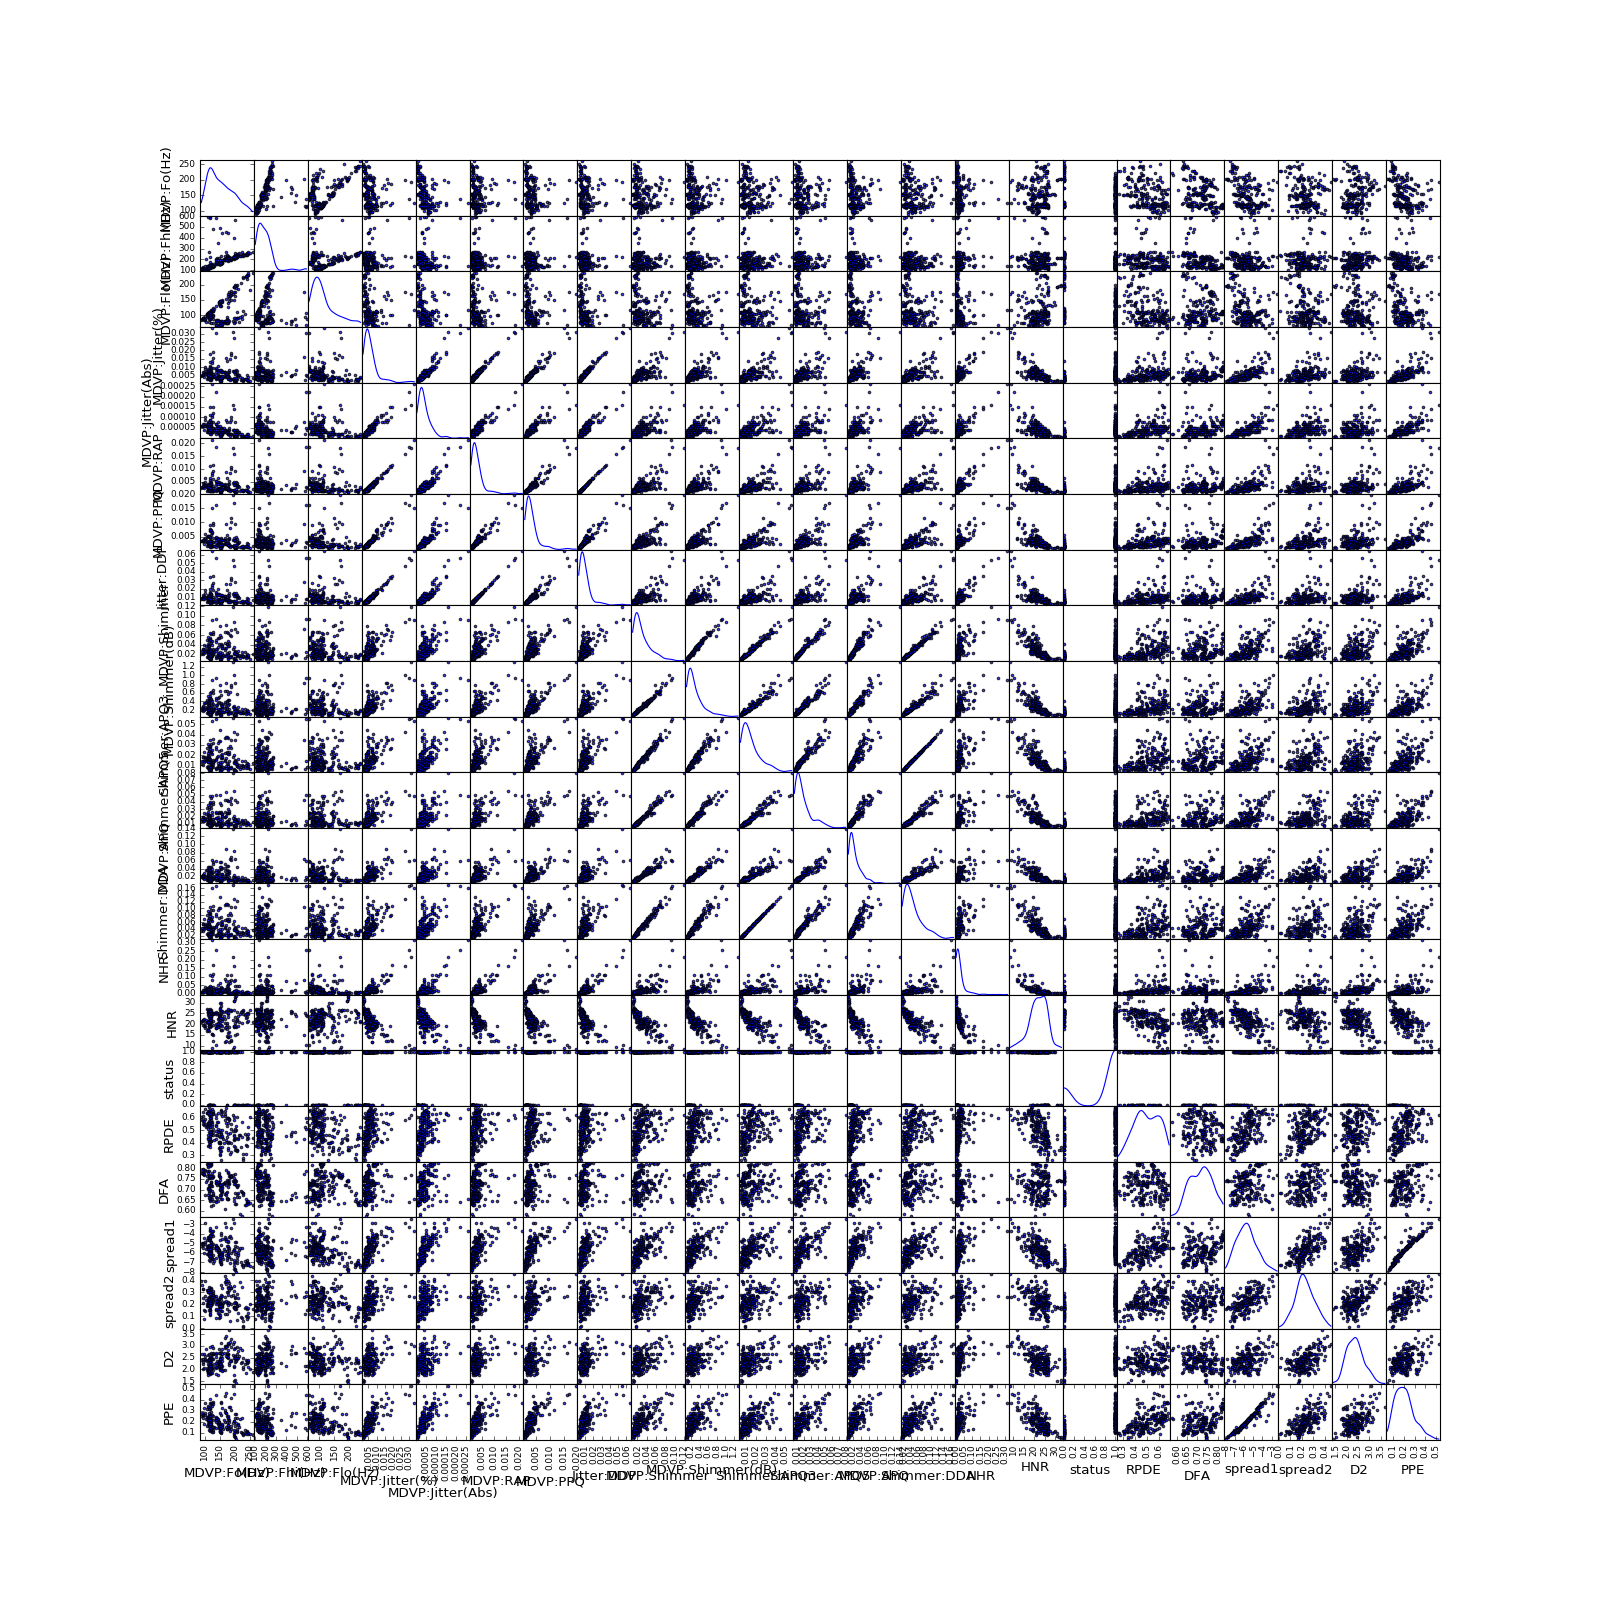

In [8]:
pd.scatter_matrix(dataset, alpha = 0.75, figsize = (20,20), diagonal = 'kde');
pylab.savefig("proje" + ".png")


<IPython.core.display.Javascript object>


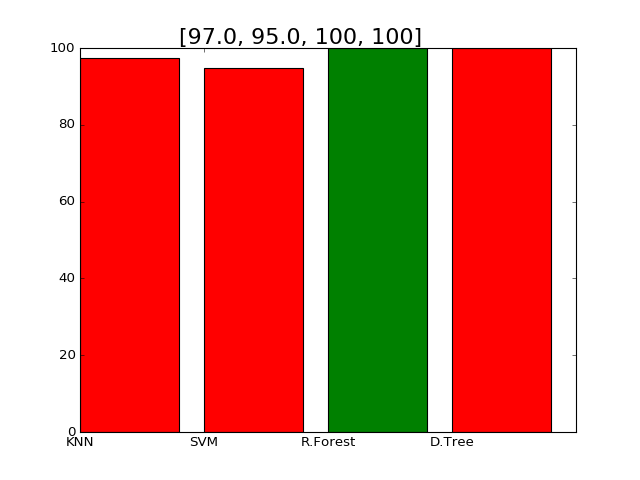

In [3]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
# Make a fake dataset
height = [basari,basarisvm, rfc_acc*100,dtc_acc*100]
oranlar = [round(basari), round(basarisvm),   round(rfc_acc*100), round(dtc_acc*100)]
enyuksek=0
for i in height:
    enyuksek=basari
    if(i>enyuksek):
        enyuksek=i
        
sozluk={'KNN':basari,'SVM':basarisvm,'R.Forest':rfc_acc*100,'D.Tree':dtc_acc*100}
if(basari==enyuksek):
    deger='KNN'
elif(basarisvm==enyuksek):
    deger='SVM'
elif(rfc_acc*100==enyuksek):
    deger='R.Forest'
else:
    deger='D.Tree'

bars = ('KNN', 'SVM', 'R.Forest', 'D.Tree')    
if(deger=='KNN'):
    y_pos = np.arange(len(bars))
    plt.bar(y_pos, height,color=['green', 'red', 'red', 'red'])
    plt.text(0.8, 100.0,oranlar, dict(size=20), verticalalignment='bottom')
elif(deger=='SVM'):
    y_pos = np.arange(len(bars))
    plt.bar(y_pos, height,color=['red', 'green', 'red', 'red'])
    plt.text(0.8, 100.0,oranlar, dict(size=20), verticalalignment='bottom')
elif(deger=='R.Forest'):
    y_pos = np.arange(len(bars))
    plt.bar(y_pos, height,color=['red', 'red', 'green', 'red'])
    plt.text(0.8, 100.0,oranlar, dict(size=20), verticalalignment='bottom')
else:
    y_pos = np.arange(len(bars))
    plt.bar(y_pos,height,color=['red', 'red', 'red', 'green'])
    plt.text(0.8, 100.0,oranlar, dict(size=20), verticalalignment='bottom')

    
plt.xticks(y_pos, bars)
plt.show()



In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Make a fake dataset
timerfc=end-start+0.1
timedtr=son-bas+0.1
timesvm=sonlanma-baslama+0.1
timeknn=ending-starting+0.1
height = [timeknn,timesvm,timerfc,timedtr]

#oranlar = [round(basari), round(basarisvm),   round(rfc_acc*100), round(dtc_acc*100)]
endusuk=0
for i in height:
    endusuk=timeknn
    if(i<endusuk):
        enyuksek=i
        
sozluk={'KNN':timeknn,'SVM':timesvm,'R.Forest':timerfc,'D.Tree':timedtr}
if(timeknn==endusuk):
    deger='KNN'
elif(timesvm==endusuk):
    deger='SVM'
elif(timerfc==endusuk):
    deger='R.Forest'
else:
    deger='D.Tree'

bars = ('KNN', 'SVM', 'R.Forest', 'D.Tree')    
if(deger=='KNN'):
    y_pos = np.arange(len(bars))
    plt.bar(y_pos, height,color=['green', 'red', 'red', 'red'])
    plt.ylim(-0.1,2.5)
   
    
    
elif(deger=='SVM'):
    y_pos = np.arange(len(bars))
    plt.bar(y_pos, height,color=['red', 'green', 'red', 'red'])
    
elif(deger=='R.Forest'):
    y_pos = np.arange(len(bars))
    plt.bar(y_pos, height,color=['red', 'red', 'green', 'red'])
   
else:
    y_pos = np.arange(len(bars))
    plt.bar(y_pos,height,color=['red', 'red', 'red', 'green'])
    

    
plt.xticks(y_pos, bars)
plt.show()